In [1]:
import numpy as np
import argparse
import dlib
import cv2
import os
import matplotlib.pyplot as plt

In [6]:
def load_eyes(folder='mrlEyes_2018_01'):
    IMG_SIZE = 50
    data = []
    
    for f in os.listdir(folder):
        for image in os.listdir(os.path.join(folder, f)):
            if (image.endswith(".png")):
                image_array = cv2.imread(os.path.join(folder, f, image), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
                if image.split('_')[4] == '0':
                    label = 0
                    cv2.imwrite('dataset_split/closed/' + image, resized_array)
                    data.append([resized_array, label])
                else:
                    label = 1
                    cv2.imwrite('dataset_split/open/' + image, resized_array)
                    data.append([resized_array, label])
    
    return data;

In [7]:
eyes = load_eyes()

In [4]:
X = []
y = []

for features, label in eyes:
    X.append(features)
    y.append(label)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [6]:
# Code to produce ten pictures from the training dataset with corresponding lable
class_names = ['closed', 'open']
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]],)

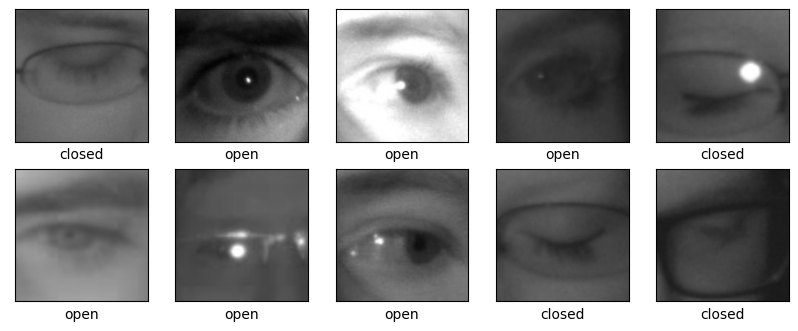

In [7]:
plt.show()

testing 1 2 3 

In [1]:
import numpy as np
import argparse
import dlib
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from imutils import face_utils
import imutils

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('D:\FYP\_Own Code\Eye Detection Codes\shape_predictor_68_face_landmarks.dat')

In [10]:
def crop_eye_dlib(img):
    IMG_SIZE = 50
    coor = (0, 0, 0, 0)
    roi = img.copy()
    
    try:
        image_array = img.copy()
        gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 1)
        if(len(rects) < 0):
            return coor, 0
        for (i, rect) in enumerate(rects):
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            coor_i, coor_j = (37, 42)
            coor = (x, y, w, h) = cv2.boundingRect(np.array([shape[coor_i:coor_j]]))
            roi = gray[y-(3*h):y+(2*h), x-w:x +(2*w)]
            roi = cv2.resize(roi, (IMG_SIZE, IMG_SIZE))

    except Exception as e:
            print(e)
            
    return coor, roi

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model('D:\FYP\_Own Code\Eye Detection Codes\models\EyeGray Acc - 0.914 Loss - 0.266.h5')  

In [13]:
import cv2

# define a video capture object
vid = cv2.VideoCapture(0)

counter = 0
while(True):
    if counter < 30:
        counter += 1
        continue
    
    counter = 0
    ret, frame = vid.read()
    coor, roi = crop_eye_dlib(frame)
    
    (x, y, w, h) = (coor[0], coor[1],coor[2],coor[3])
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 1)
    
    roi = np.array(roi).reshape(-1,50,50,1)
    roi = roi.astype('float32') / 255.0
    pred = model.predict(roi)
    
    text = ''
    if pred < 0.5:
        text = 'closed'
    else:
        text = 'open'
        
    cv2.putText(frame, text, (x-10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.imshow('frame', frame)
      
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

ValueError: cannot reshape array of size 921600 into shape (50,50,1)